In [2]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from scikitplot.estimators import plot_learning_curve
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate , learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

from yellowbrick.model_selection import LearningCurve

np.warnings.filterwarnings('ignore')


In [3]:
df_model = pd.read_csv("clean.csv")
df_model

,Unnamed: 0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,0,2017,0,3,34,1,0,0,0
1,1,0,2013,2,1,28,0,0,3,1
2,2,0,2014,1,3,38,0,0,2,0
3,3,1,2016,0,3,27,1,0,5,1
4,4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
4648,4648,0,2013,0,3,26,0,0,4,0
4649,4649,1,2013,2,2,37,1,0,2,1
4650,4650,1,2018,1,3,27,1,0,5,1
4651,4651,0,2012,0,3,30,1,1,2,0


In [4]:
X = df_model.drop(["LeaveOrNot" ], axis=1)
y = df_model.LeaveOrNot

In [5]:
X_train , X_test , y_train ,  y_test = train_test_split(X , y , random_state=42 , test_size=0.2)

In [6]:
X_train.shape

(3722, 9)

In [7]:
y_test.shape

(931,)

# Baseline model, StandardScaler + MinMaxScaler + DummyClassifier

In [8]:
preprocessing_ss = Pipeline(steps=[
    ('normal', StandardScaler())])

preprocessing_mms = Pipeline(steps=[ 
   ('Minmax',MinMaxScaler())])
        

In [9]:
pipeline_DC = Pipeline(steps = [['preprocess_min_max_scaler', preprocessing_mms],
                                    ["preprocess_standardScaler" , preprocessing_ss],
                                    ['classifier', DummyClassifier(strategy="uniform")]
                                     ])

In [10]:
pipeline_DC.fit(X_train , y_train)

Pipeline(steps=[('preprocess_min_max_scaler',
                 Pipeline(steps=[('Minmax', MinMaxScaler())])),
                ('preprocess_standardScaler',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['classifier', DummyClassifier(strategy='uniform')]])

In [11]:
print("accuracy train : %.3f"%pipeline_DC.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_DC.score(X_test , y_test))

accuracy train : 0.501
accuracy test : 0.496


In [12]:
y_pred_DC = pipeline_DC.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred_DC))

              precision    recall  f1-score   support

           0       0.67      0.54      0.59       610
           1       0.36      0.49      0.41       321

    accuracy                           0.52       931
   macro avg       0.51      0.51      0.50       931
weighted avg       0.56      0.52      0.53       931



In [14]:
confusion_matrix(y_test, y_pred_DC)

array([[327, 283],
       [164, 157]], dtype=int64)

In [15]:
cv = cross_validate(pipeline_DC , X , y)
cv["test_score"].mean()

0.48914752318584476

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

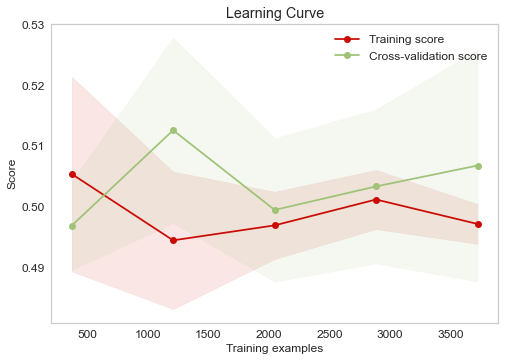

In [16]:
plot_learning_curve(pipeline_DC, X, y)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

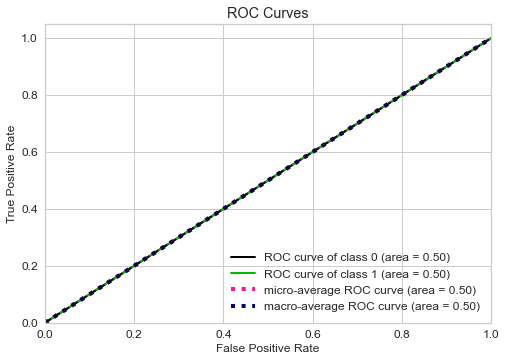

In [17]:
pipeline_DC.fit(X_train, y_train)
y_probas = pipeline_DC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 1éme itération ,  Smote + DummyClassifier

In [18]:
sm = SMOTE( sampling_strategy='auto')

In [19]:
pipeline_DCS = imbpipeline(steps = [['SMOTE', sm],
                                    ['classifier', DummyClassifier(strategy="uniform")]
                                     ])

In [20]:
pipeline_DCS.fit(X_train , y_train)

Pipeline(steps=[('SMOTE', SMOTE()),
                ['classifier', DummyClassifier(strategy='uniform')]])

In [21]:
print("accuracy train : %.3f"%pipeline_DCS.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_DCS.score(X_test , y_test))

accuracy train : 0.509
accuracy test : 0.495


In [22]:
y_pred_DCS = pipeline_DCS.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred_DCS))

              precision    recall  f1-score   support

           0       0.67      0.52      0.58       610
           1       0.36      0.50      0.42       321

    accuracy                           0.51       931
   macro avg       0.51      0.51      0.50       931
weighted avg       0.56      0.51      0.53       931



In [24]:
confusion_matrix(y_test, y_pred_DCS)

array([[316, 294],
       [159, 162]], dtype=int64)

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

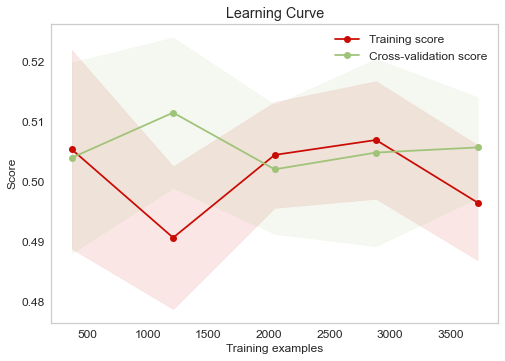

In [25]:
plot_learning_curve(pipeline_DCS, X, y)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

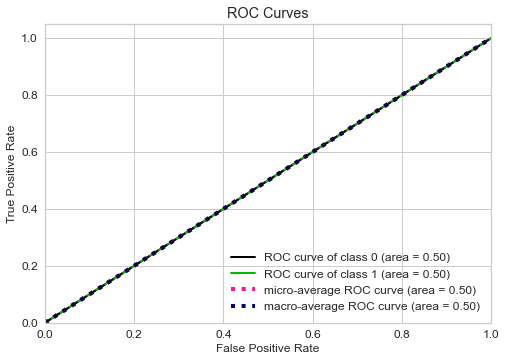

In [26]:
pipeline_DCS.fit(X_train, y_train)
y_probas = pipeline_DCS.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 2éme itération , StandardScaler , MinMaxScaler , KNeighborsClassfier

In [27]:
pipeline_knn = Pipeline(steps = [['preprocess_min_max_scaler', preprocessing_mms],
                                    ["preprocess_standardScaler" , preprocessing_ss],
                                    ['classifier', KNeighborsClassifier(weights="uniform" , algorithm="auto" )]
                                     ])

In [28]:
pipeline_knn.fit(X_train , y_train)

Pipeline(steps=[('preprocess_min_max_scaler',
                 Pipeline(steps=[('Minmax', MinMaxScaler())])),
                ('preprocess_standardScaler',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['classifier', KNeighborsClassifier()]])

In [29]:
print("accuracy train : %.3f"%pipeline_knn.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_knn.score(X_test , y_test))

accuracy train : 0.858
accuracy test : 0.824


In [30]:
y_pred_knn = pipeline_knn.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       610
           1       0.83      0.61      0.71       321

    accuracy                           0.82       931
   macro avg       0.83      0.77      0.79       931
weighted avg       0.83      0.82      0.82       931



In [32]:
confusion_matrix(y_test, y_pred_knn)

array([[571,  39],
       [125, 196]], dtype=int64)

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

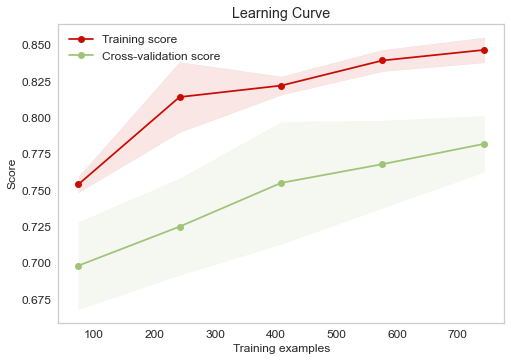

In [33]:
plot_learning_curve(pipeline_knn, X_test, y_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

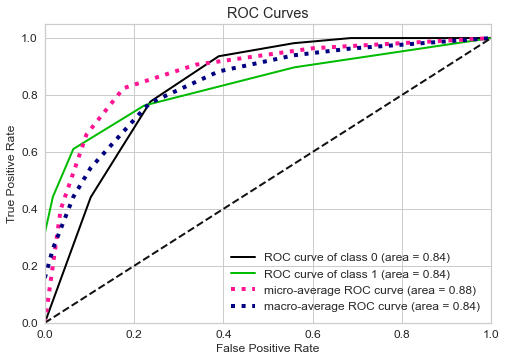

In [34]:
pipeline_knn.fit(X_train, y_train)
y_probas = pipeline_knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 4éme itération ,  Smote + LogisticRegression

In [35]:
pipeline_LRS = imbpipeline(steps = [['SMOTE', sm],
                                    ['classifier', LogisticRegression()]
                                     ])

In [36]:
pipeline_LRS.fit(X_train , y_train)

Pipeline(steps=[('SMOTE', SMOTE()), ['classifier', LogisticRegression()]])

In [37]:
print("accuracy train : %.3f"%pipeline_LRS.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_LRS.score(X_test , y_test))

accuracy train : 0.638
accuracy test : 0.653


In [38]:
y_pred_lrs = pipeline_LRS.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred_lrs))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       610
           1       0.50      0.57      0.53       321

    accuracy                           0.65       931
   macro avg       0.63      0.63      0.63       931
weighted avg       0.67      0.65      0.66       931



In [40]:
confusion_matrix(y_test, y_pred_lrs)

array([[425, 185],
       [138, 183]], dtype=int64)

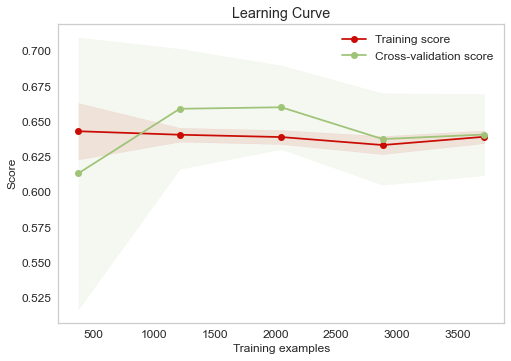

In [41]:

plot_learning_curve(pipeline_LRS, X,  y)
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

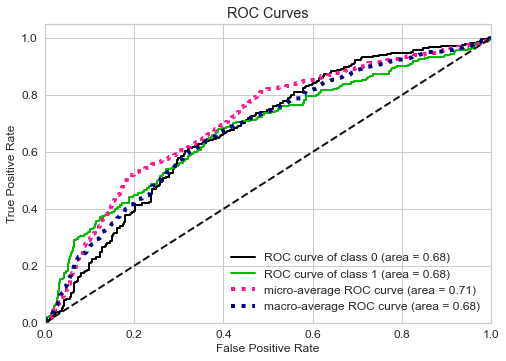

In [42]:
pipeline_LRS.fit(X_train, y_train)
y_probas = pipeline_LRS.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 5éme itération , StandardScaler + MinMaxScaler + LogisticRegression

In [43]:
pipeline_log = Pipeline(steps = [['preprocess_min_max_scaler', preprocessing_mms],
                                    ["preprocess_standardScaler" , preprocessing_ss],
                                    ['classifier', LogisticRegression()]
                                     ])

In [44]:
pipeline_log.fit(X_train , y_train)

Pipeline(steps=[('preprocess_min_max_scaler',
                 Pipeline(steps=[('Minmax', MinMaxScaler())])),
                ('preprocess_standardScaler',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['classifier', LogisticRegression()]])

In [45]:
pipeline_log.score(X_train , y_train)

0.7079527135948415

In [46]:
print("accuracy train : %.3f"%pipeline_log.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_log.score(X_test , y_test))

accuracy train : 0.708
accuracy test : 0.711


In [47]:
y_pred_log=pipeline_log.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       610
           1       0.63      0.39      0.48       321

    accuracy                           0.71       931
   macro avg       0.68      0.64      0.64       931
weighted avg       0.70      0.71      0.69       931



In [49]:
confusion_matrix(y_test, y_pred_log)

array([[536,  74],
       [195, 126]], dtype=int64)

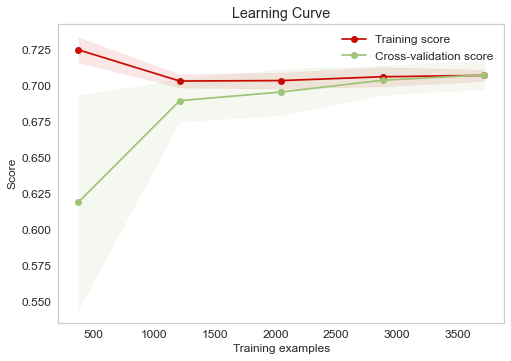

In [50]:
plot_learning_curve(pipeline_log, X,  y)
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

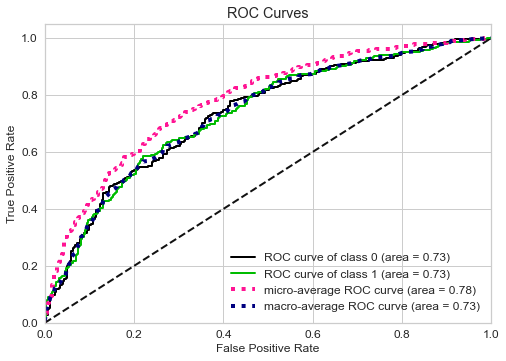

In [51]:
pipeline_log.fit(X_train, y_train)
y_probas = pipeline_log.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 6éme itération , StandardScaler + MinMaxScaler + Bagging + KNN

In [52]:
model_bagging = BaggingClassifier(base_estimator=KNeighborsClassifier() )

In [53]:
model_bagging.fit(X_train , y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier())

In [54]:
y_pred_bag = model_bagging.predict(X_test)

In [55]:
print("accuracy train : %.3f"%model_bagging.score(X_train , y_train))
print("accuracy test : %.3f"%model_bagging.score(X_test , y_test))

accuracy train : 0.735
accuracy test : 0.588


In [72]:
confusion_matrix(y_test, y_pred_bag)

array([[476, 134],
       [250,  71]], dtype=int64)

In [56]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71       610
           1       0.35      0.22      0.27       321

    accuracy                           0.59       931
   macro avg       0.50      0.50      0.49       931
weighted avg       0.55      0.59      0.56       931



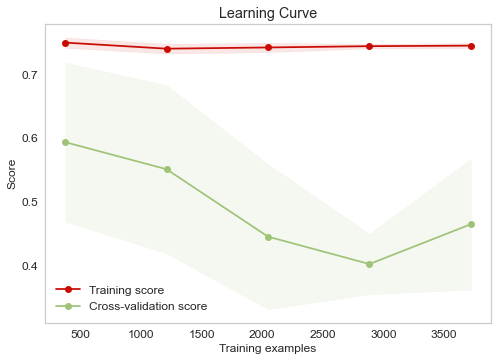

In [57]:
plot_learning_curve(model_bagging, X,  y)
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

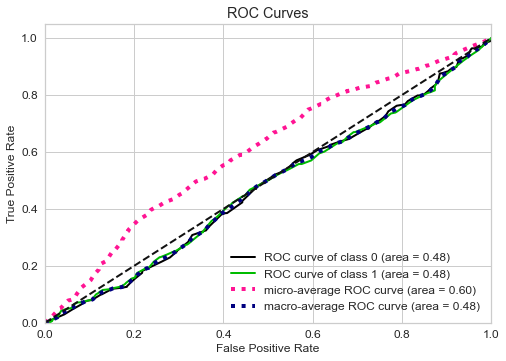

In [58]:
model_bagging.fit(X_train, y_train)
y_probas = model_bagging.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 7éme itération , StandardScaler + MinMaxScaler + GradientBoosting

In [59]:
model_boosting = GradientBoostingClassifier(n_estimators=50)

In [60]:
model_boosting.fit(X_train , y_train)
y_pred_boosting = model_boosting.predict(X_test)


In [61]:
print("accuracy train : %.3f"%model_boosting.score(X_train , y_train))
print("accuracy test : %.3f"%model_boosting.score(X_test , y_test))

accuracy train : 0.832
accuracy test : 0.838


In [71]:
confusion_matrix(y_test, y_pred_boosting)

array([[585,  25],
       [126, 195]], dtype=int64)

In [62]:
print(classification_report(y_test, y_pred_boosting))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       610
           1       0.89      0.61      0.72       321

    accuracy                           0.84       931
   macro avg       0.85      0.78      0.80       931
weighted avg       0.84      0.84      0.83       931



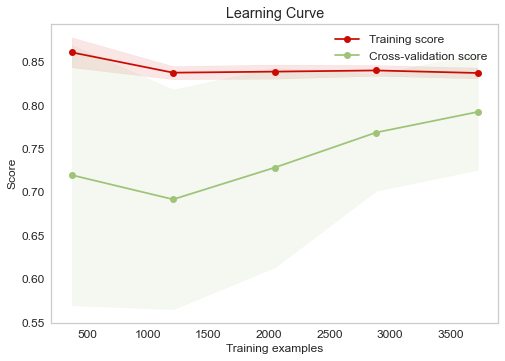

In [63]:
plot_learning_curve(model_boosting, X,  y)
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

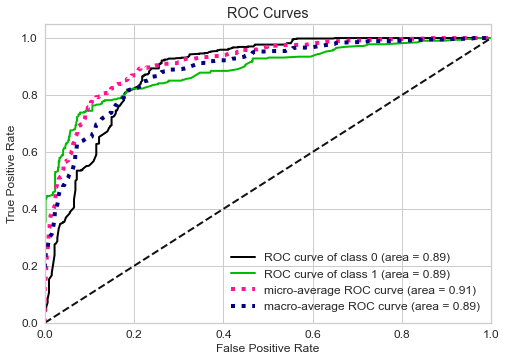

In [64]:
model_boosting.fit(X_train, y_train)
y_probas = model_boosting.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 8éme itération , StandardScaler + MinMaxScaler + sampling

In [65]:
model_stacking = StackingClassifier([
                                    ("KNN" , pipeline_knn)])
model_stacking.fit(X_test , y_test)
y_pred_stack = model_stacking.predict(X_test)

In [66]:
print("accuracy train : %.3f"%model_stacking.score(X_train , y_train))
print("accuracy test : %.3f"%model_stacking.score(X_test , y_test))

accuracy train : 0.767
accuracy test : 0.858


In [67]:
print(classification_report(y_test, y_pred_stack))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       610
           1       0.89      0.68      0.77       321

    accuracy                           0.86       931
   macro avg       0.87      0.82      0.83       931
weighted avg       0.86      0.86      0.85       931



In [70]:
confusion_matrix(y_test, y_pred_stack)

array([[582,  28],
       [104, 217]], dtype=int64)

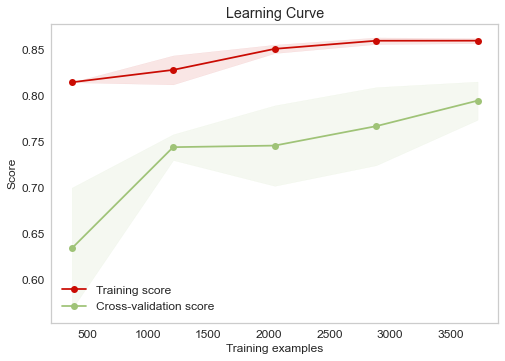

In [68]:
plot_learning_curve(model_stacking, X,  y)
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

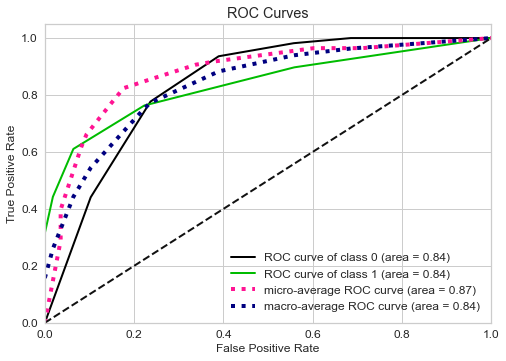

In [69]:
model_stacking.fit(X_train, y_train)
y_probas = model_stacking.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)